<a href="https://colab.research.google.com/github/MohammedFarzin/Fine-tuning-llms/blob/main/preparing_dataset_for_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and analyze the dataset


In [ ]:
# Install libraries
! pip install transformers faiss-gpu datasets sentence_transformers --progress-bar off

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Attempting uninstall: requests
    Found existing i

In [ ]:
from google.colab import userdata

hf_token = userdata.get('HF_TOKEN')

In [ ]:
# loading the dataset
from datasets import load_dataset

dataset = load_dataset("garage-bAInd/Open-Platypus")
dataset

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction', 'data_source'],
        num_rows: 24926
    })
})

In [ ]:
dataset['train'].to_pandas()

,input,output,instruction,data_source
0,,To find the probability of the spinner landing...,A board game spinner is divided into three par...,MATH/PRM-800K
1,,"I need to choose 6 people out of 14, and the o...",My school's math club has 6 boys and 8 girls. ...,MATH/PRM-800K
2,,First we count the number of all 4-letter word...,How many 4-letter words with at least one cons...,MATH/PRM-800K
3,,She can do this if and only if at least one of...,Melinda will roll two standard six-sided dice ...,MATH/PRM-800K
4,,Think of the problem as a sequence of H's and ...,"Let $p$ be the probability that, in the proces...",MATH/PRM-800K
...,...,...,...,...
24921,,There are several formulas that generate all p...,Can we find a formula to generate all prime nu...,guanaco
24922,,"Sure, here are some of the best universities:\...",What are some of the best university's for stu...,guanaco
24923,,[Enter stage left]\n\nFirst Citizen: Good morr...,Write me a SPL (Shakespeare Programming Langua...,guanaco
24924,,That's a very thoughtful idea! Here are some s...,Hi. I want to make an embossed picture for my ...,guanaco


In [ ]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

tokenizer = AutoTokenizer.from_pretrained('unsloth/llama-3-8b')
instruction_token_counts = [len(tokenizer.tokenize(example['instruction'])) for example in dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example['output'])) for example in dataset['train']]
combined_token_counts = [instruction + output for instruction , output in zip(instruction_token_counts, output_token_counts)]
combined_token_counts

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[286,
 148,
 247,
 168,
 484,
 221,
 358,
 115,
 349,
 272,
 146,
 271,
 270,
 195,
 185,
 1026,
 269,
 112,
 301,
 256,
 227,
 247,
 388,
 195,
 461,
 650,
 679,
 194,
 164,
 433,
 198,
 235,
 227,
 216,
 242,
 331,
 261,
 295,
 235,
 247,
 60,
 586,
 237,
 289,
 181,
 478,
 272,
 328,
 186,
 203,
 649,
 405,
 599,
 183,
 370,
 277,
 153,
 533,
 503,
 145,
 118,
 152,
 197,
 127,
 54,
 303,
 231,
 159,
 212,
 475,
 144,
 631,
 516,
 535,
 451,
 177,
 344,
 474,
 161,
 336,
 186,
 358,
 130,
 555,
 177,
 31,
 186,
 499,
 398,
 378,
 1018,
 338,
 363,
 331,
 395,
 266,
 130,
 111,
 101,
 132,
 296,
 547,
 399,
 216,
 276,
 241,
 231,
 215,
 192,
 364,
 356,
 271,
 215,
 169,
 192,
 144,
 355,
 151,
 321,
 250,
 561,
 339,
 600,
 301,
 118,
 263,
 184,
 209,
 120,
 201,
 229,
 263,
 211,
 194,
 833,
 219,
 254,
 240,
 299,
 304,
 553,
 239,
 260,
 171,
 235,
 261,
 242,
 164,
 358,
 250,
 117,
 320,
 267,
 116,
 123,
 181,
 361,
 264,
 232,
 890,
 308,
 141,
 408,
 121,
 320,
 291,
 239,

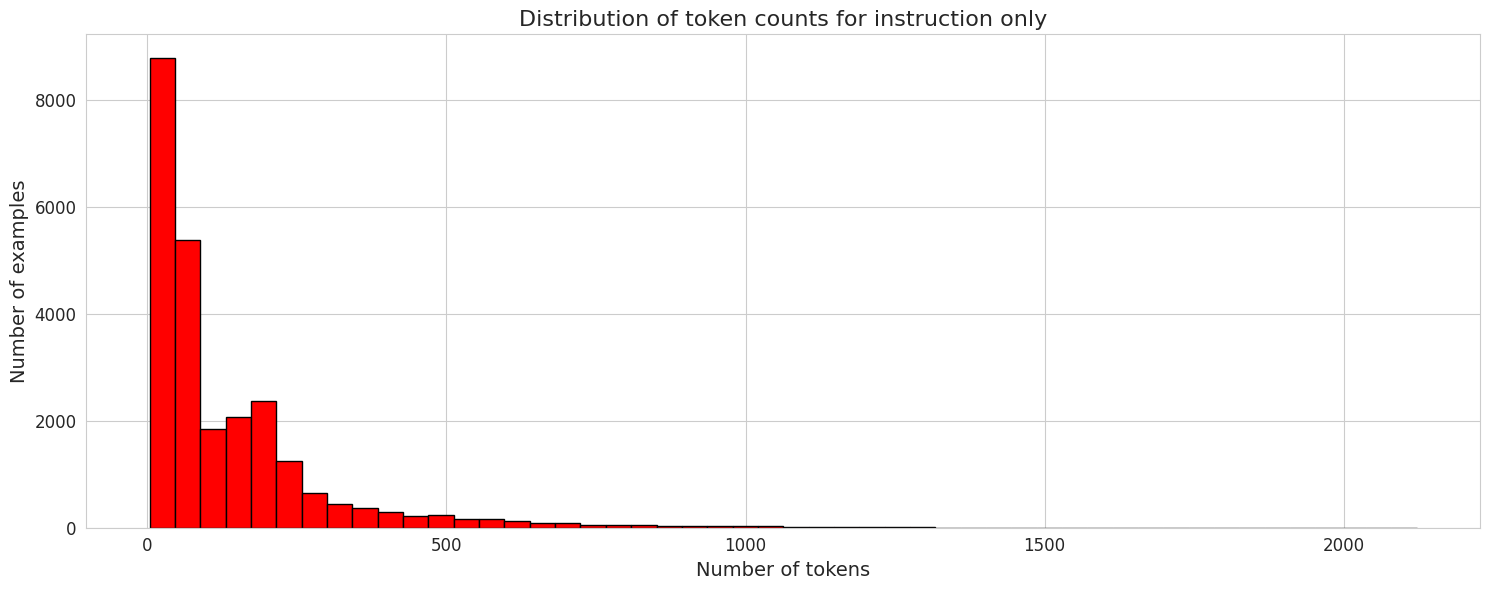

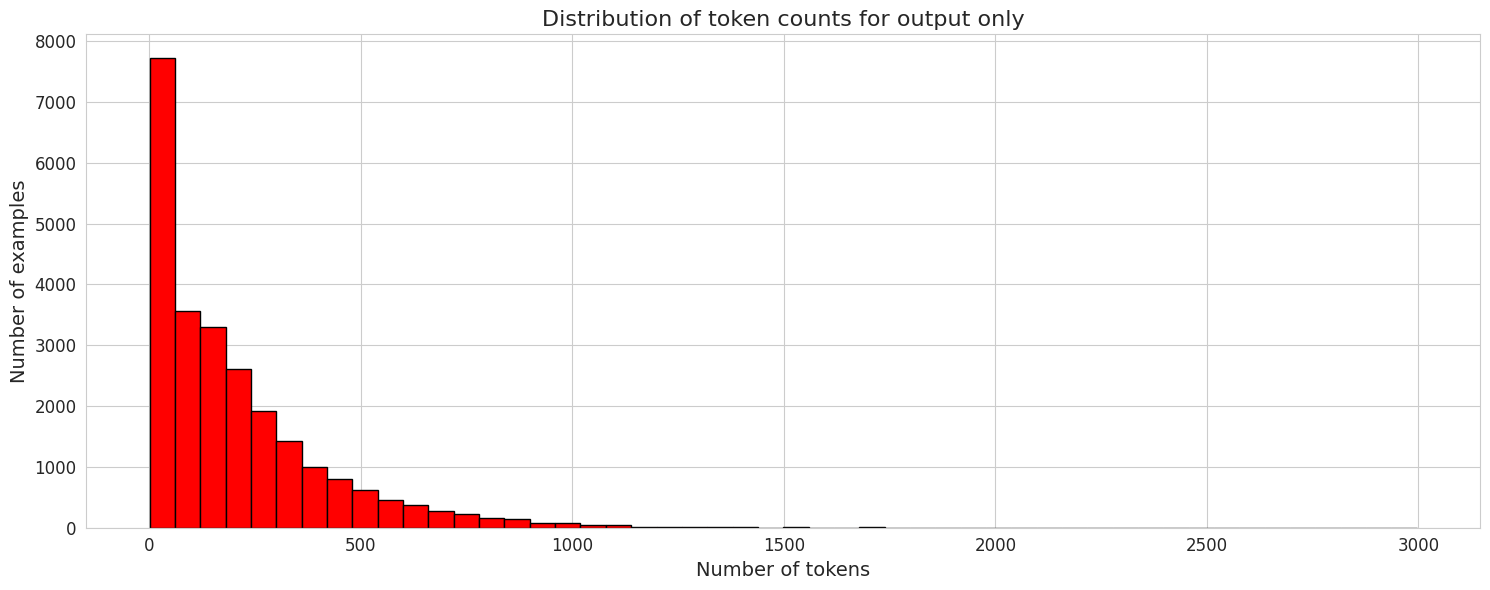

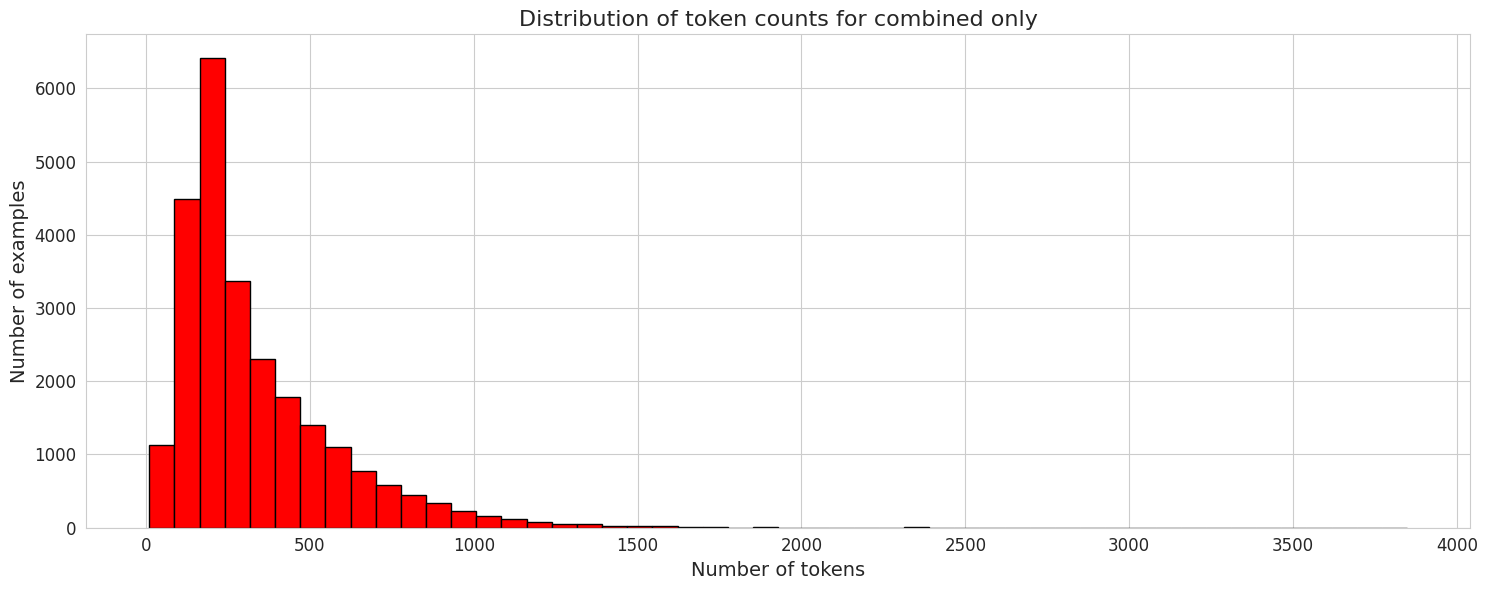

In [ ]:
def plot_distribution(token_counts, title):
  sns.set_style("whitegrid")
  plt.figure(figsize=(15, 6))
  plt.hist(token_counts, bins=50, color='r', edgecolor='black')
  plt.title(title, fontsize=16)
  plt.xlabel("Number of tokens", fontsize=14)
  plt.ylabel("Number of examples", fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.tight_layout()
  plt.show()


plot_distribution(instruction_token_counts, "Distribution of token counts for instruction only")
plot_distribution(output_token_counts, "Distribution of token counts for output only")
plot_distribution(combined_token_counts, "Distribution of token counts for combined only")

## Filtering out rows

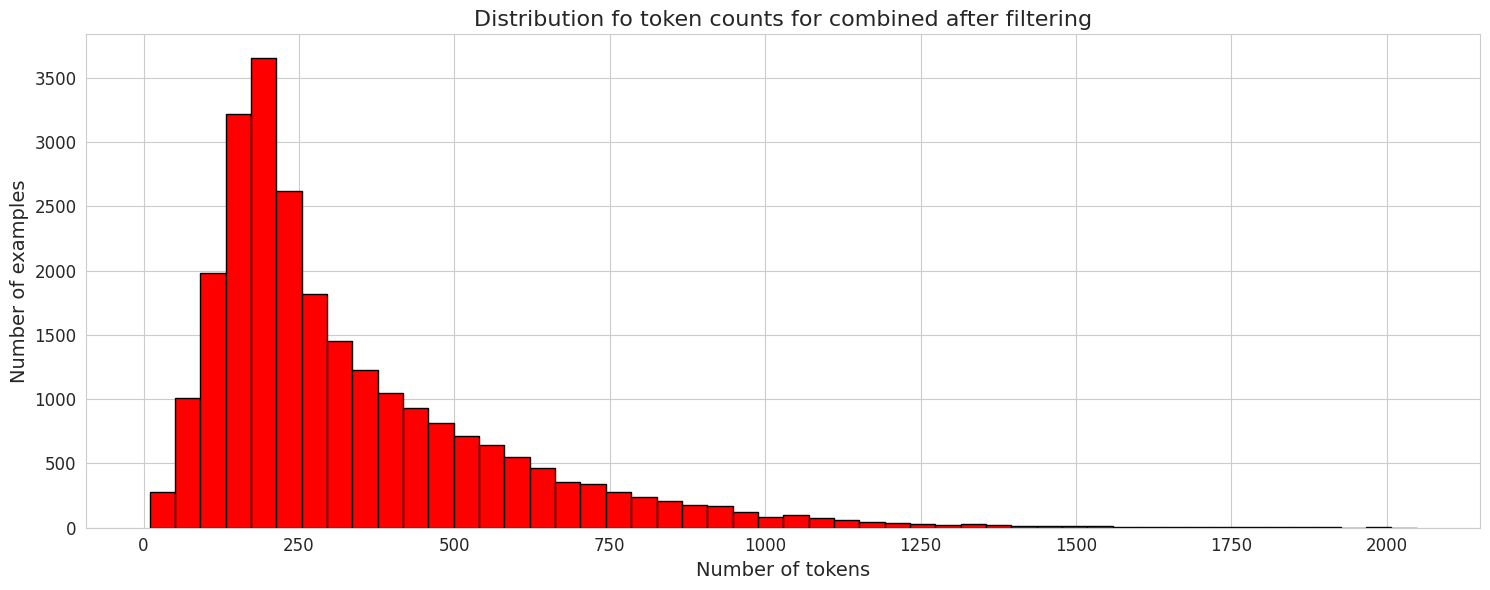

In [ ]:
valid_indices = [i for i, count in enumerate(combined_token_counts) if count <= 2048]
dataset['train'] = dataset['train'].select(valid_indices)
token_counts = [combined_token_counts[i] for i in valid_indices]

plot_distribution(token_counts, "Distribution fo token counts for combined after filtering")

In [ ]:
len(dataset['train'])


24911

## Dedupliction using embeddings

In [ ]:
import torch
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"


In [ ]:
from sentence_transformers import SentenceTransformer
import faiss
from datasets import Dataset, DatasetDict
from tqdm.autonotebook import tqdm
import numpy as np

def deduplicate_dataset(dataset: Dataset, model:str, threshold:float):
  sentence_model = SentenceTransformer(model, device="cpu")
  outputs = [example['output'] for example in dataset['train']]

  print("Converting text to embeddings...")
  embeddings = sentence_model.encode(outputs, device=DEVICE)
  dimension = embeddings.shape[1]
  index = faiss.IndexFlatIP(dimension)
  normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
  index.add(normalized_embeddings)

  print("Filtering  out near-duplicate.....")
  D, I = index.search(normalized_embeddings, k=2)
  to_keep = []
  for i in tqdm(range(len(embeddings)), desc="Filtering"):
    if D[i, 1] < threshold:
      to_keep.append(i)
  dataset = dataset['train'].select(to_keep)
  return DatasetDict({"train": dataset})

deduped_dataset = deduplicate_dataset(dataset, "sentence-transformers/all-mpnet-base-v2", 0.95)






modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Converting text to embeddings...


In [ ]:
print(len(dataset['train']))
print(len(deduped_dataset['train']))
print(len(dataset['train']) - len(deduped_dataset['train']))


## Top-K sampling

In [ ]:
def get_top_k_rows(dataset, token_counts, k):
  sorted_indices = sorted(range(len(token_counts)), key=lambda i: token_counts[i], reverse=True)
  top_k_indices = sorted_indices[:k]
  return dataset['train'].select(top_k_indices)


instruction_token_counts = [len(tokenizer.tokenize(example['instruction'])) for example in deduped_dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example['output'])) for example in deduped_dataset['train']]
combined_token_counts = [instruction + output for instruction , output in zip(instruction_token_counts, output_token_counts)]

k = 1000
top_k_dataset = get_top_k_rows(deduped_dataset, combined_token_counts, k)
dataset = DatasetDict({"train": top_k_dataset})